### Mối tương quan giữa các đặc trưng trong tập dữ liệu

Để xem xét các đặc trưng có sẵn trong tập dữ liệu, ta muốn xác định và phân tích mối quan hệ giữa chúng, đồng thời xác định những đặc trưng nào trong tập dữ liệu đóng góp đáng kể vào mục tiêu giải pháp. Chúng em sử dụng các phép tính và trực quan hóa để vẽ biểu đồ nhiệt về ma trận hệ số tương quan giữa các cột trong một tập dữ liệu.

#### Khai báo các thư viện cần thiết.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Đọc dữ liệu đã làm sạch ở phần Preprocessing.

In [2]:
file_name = './data/cleaned_air_quality_health_impact_data.csv'
cleaned_df = pd.read_csv(file_name)

#### Hiển thị 5 dòng đầu của dữ liệu. 

In [3]:
cleaned_df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


#### Vẽ biểu đồ nhiệt về ma trận hệ số tương quan giữa, làm tròn đến một chữ số.

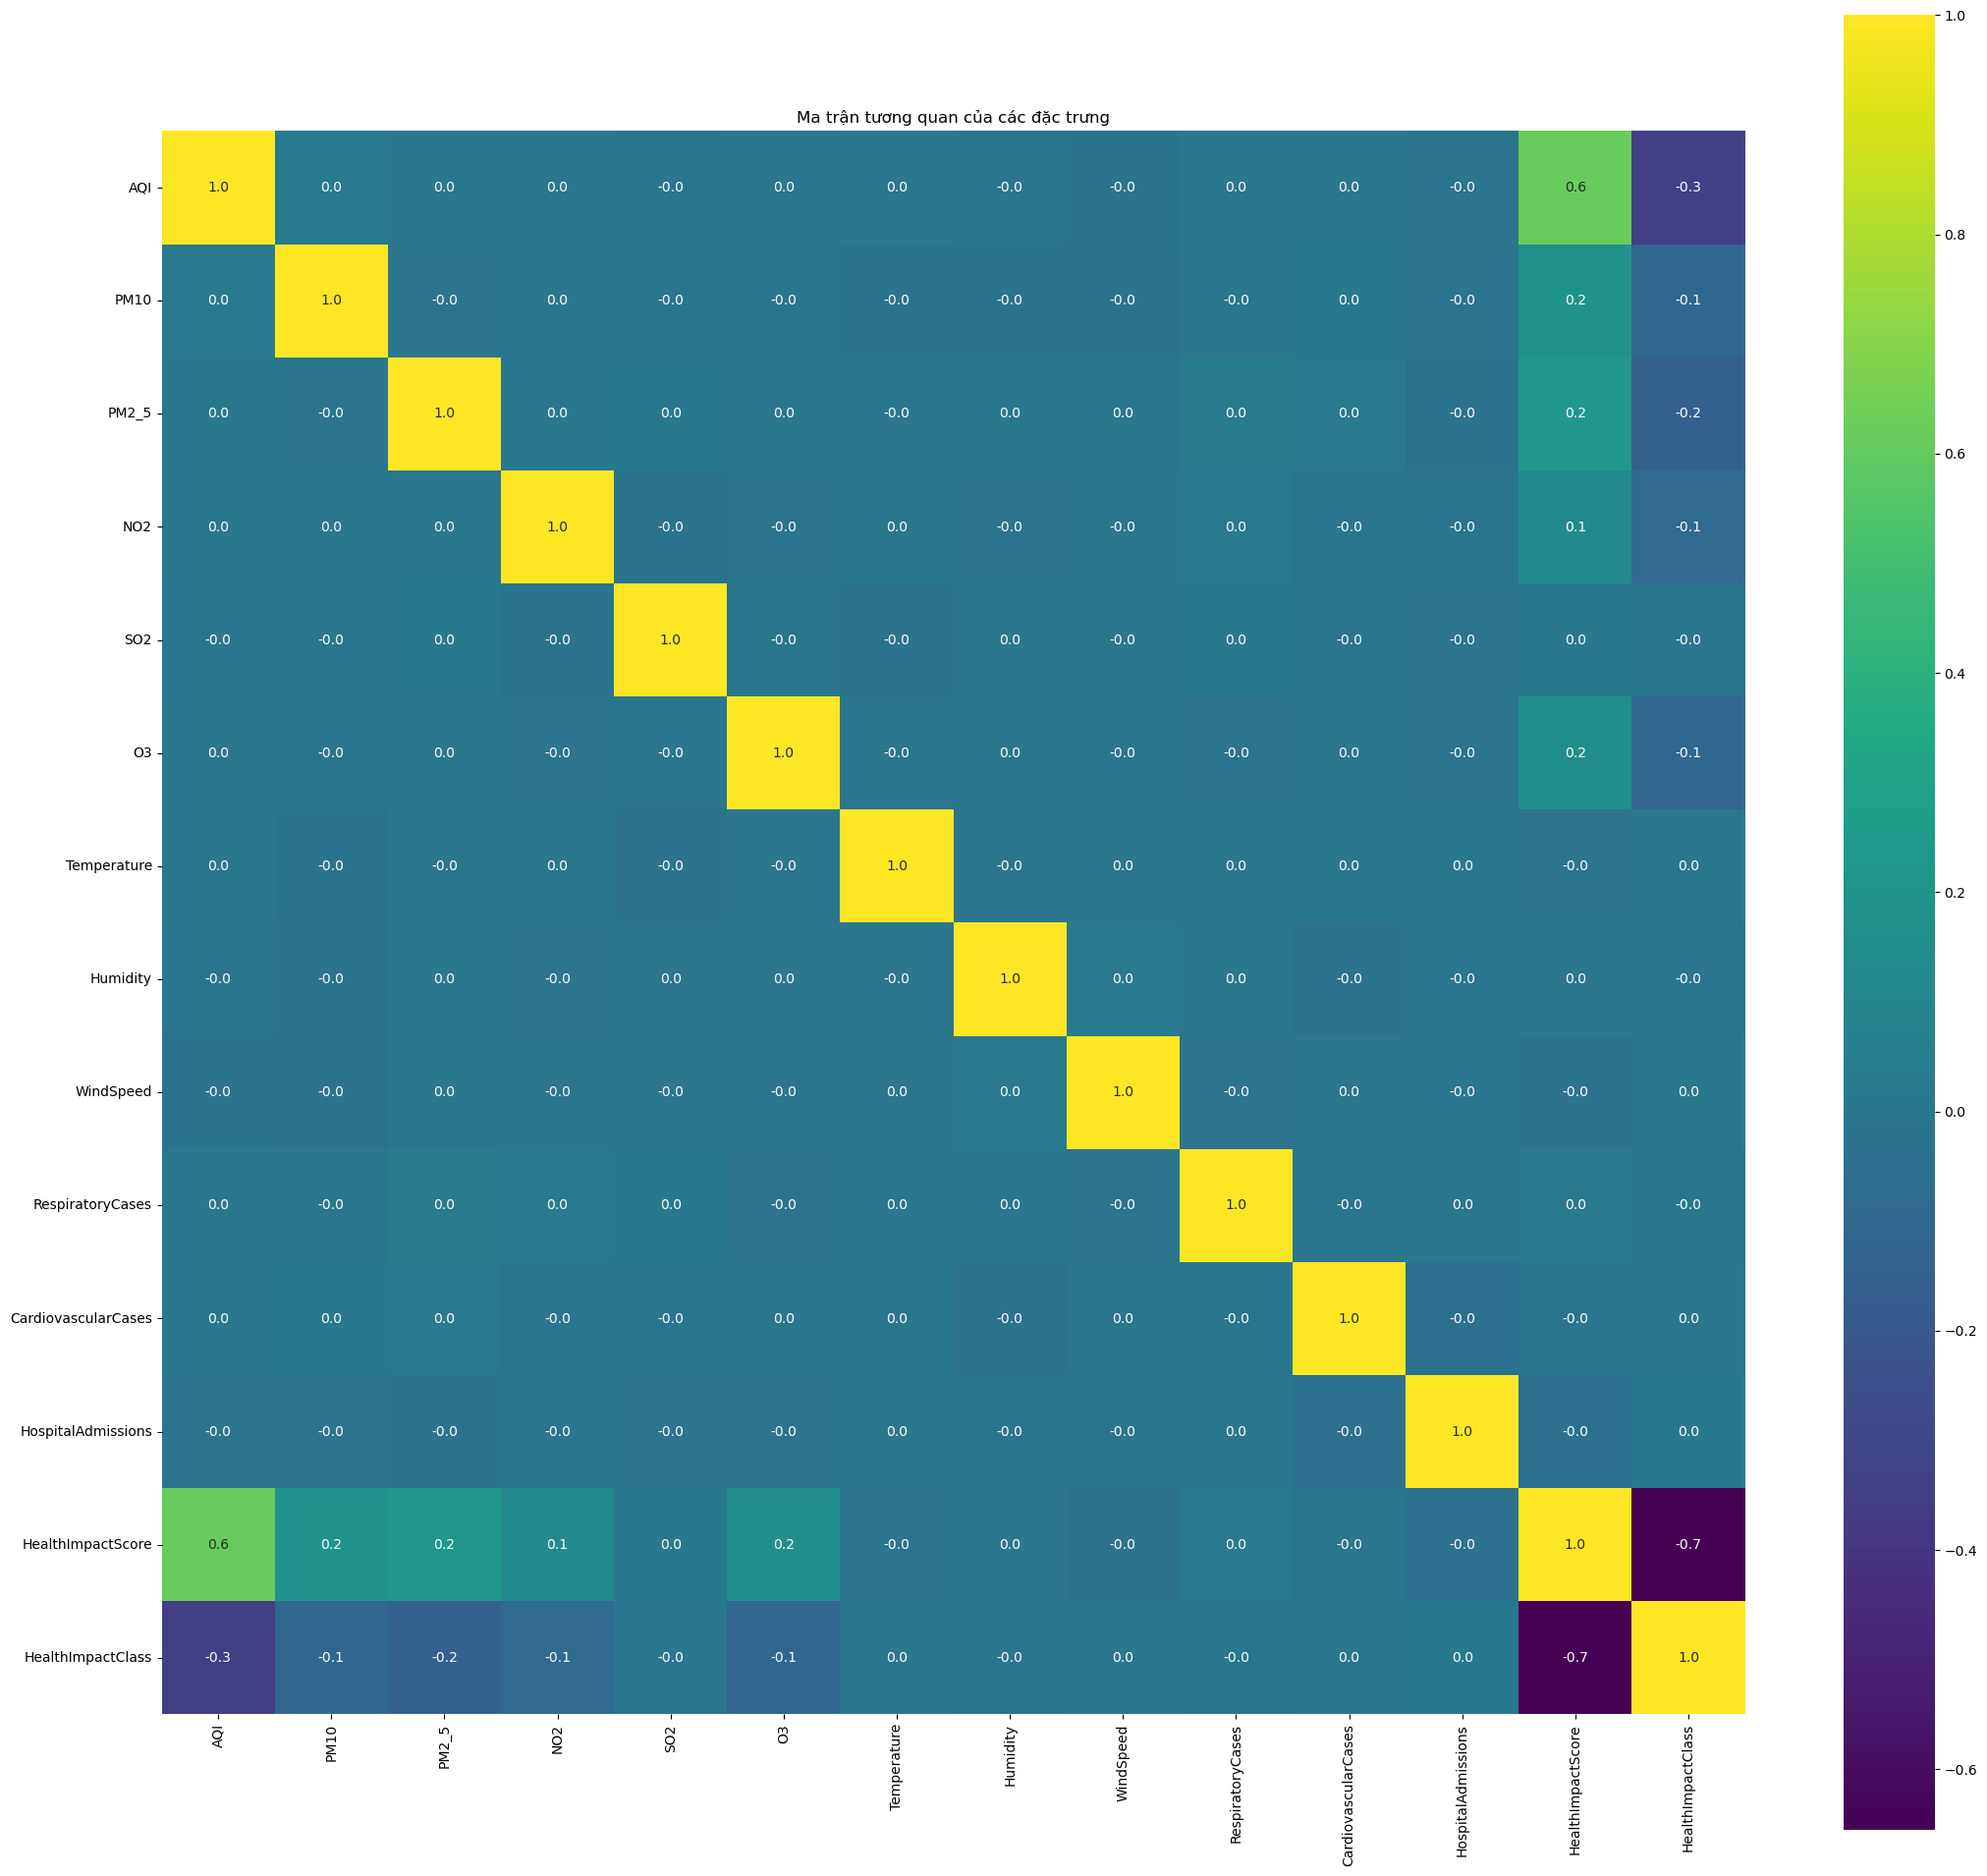

In [4]:
correlation_matrix = cleaned_df.corr()
plt.figure(figsize=(26, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="viridis", cbar=True, square=True)
plt.title('Ma trận tương quan của các đặc trưng')
plt.show()

#### Rút trích các cặp tương quan thuận, nghịch mạnh và gần như không tương quan từ ma trận tương quan để đánh giá mức độ ảnh hưởng của từng biến đối với các yếu tố khác.

In [5]:
# Tương quan thuận mạnh (>= 0.9)
strong_positive = correlation_matrix[(correlation_matrix >= 0.9) & (correlation_matrix != 1.0)]
# Tương quan nghịch mạnh (<= -0.9)
strong_negative = correlation_matrix[correlation_matrix <= -0.9]
# Gần như không tương quan (-0.1 < và < 0.1)
no_correlation = correlation_matrix[(correlation_matrix > -0.1) & (correlation_matrix < 0.1)]
print("Tương quan thuận mạnh (>= 0.9):")
print(strong_positive)

print("\nTương quan nghịch mạnh (<= -0.9):")
print(strong_negative)

print("\nGần như không tương quan (-0.1 < x < 0.1):")
print(no_correlation)

Tương quan thuận mạnh (>= 0.9):
                     AQI  PM10  PM2_5  NO2  SO2  O3  Temperature  Humidity  \
AQI                  NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
PM10                 NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
PM2_5                NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
NO2                  NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
SO2                  NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
O3                   NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
Temperature          NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
Humidity             NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
WindSpeed            NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
RespiratoryCases     NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
CardiovascularCases  NaN   NaN    NaN  NaN  NaN NaN          NaN       NaN   
HospitalAdmissions   NaN   NaN  

Dựa vào việc rút trích trên có thể thấy được ở các mối quan hệ tương quan như sau:

* Tương quan thuận mạnh (>= 0.9): Đây là các biến có sự liên kết rất chặt chẽ, nhưng trong dữ liệu trên, không có mối quan hệ tương quan mạnh mẽ nào ở mức trên 0.9.

* Tương quan nghịch mạnh (<= -0.9): Các giá trị trong trường hợp này cũng cho thấy không có mối tương quan nghịch mạnh.

* Gần như không tương quan (-0.1 < x < 0.1): 
1. Trong bộ dữ liệu, một số cặp biến có mối quan hệ gần như không tương quan, với hệ số tương quan gần bằng 0. Ví dụ, mối quan hệ giữa chỉ số AQI và các yếu tố như PM10 (hệ số tương quan 0.023), PM2.5 (hệ số tương quan 0.005), NO2 (hệ số tương quan 0.007), SO2 (-0.006) và O3 (0.002) đều rất yếu. Tương tự, các yếu tố môi trường như nhiệt độ và độ ẩm cũng cho thấy mối quan hệ yếu với AQI, với hệ số tương quan lần lượt là 0.004 và -0.004.

2. Ngoài ra, trong các cặp biến như PM10 và PM2.5 (hệ số tương quan -0.012), PM10 và NO2 (0.008), PM10 và SO2 (-0.007), hay PM2.5 và O3 (0.006), các mối quan hệ giữa chúng cũng không có sự tương quan mạnh. Đặc biệt, một số yếu tố như SO2 và O3 có hệ số tương quan âm rất yếu, như giữa SO2 và O3 (-0.004), hay SO2 và nhiệt độ (-0.022).

3. Tương tự, mối quan hệ giữa các chỉ số ô nhiễm và các ca bệnh hô hấp, bệnh tim mạch, và nhập viện cũng cho thấy sự tương quan rất yếu. Ví dụ, AQI có hệ số tương quan rất nhỏ với các trường hợp bệnh hô hấp (0.009) và bệnh tim mạch (0.009), trong khi mối quan hệ giữa các yếu tố như PM10, PM2.5 và các ca bệnh này cũng không mạnh mẽ. Các yếu tố như nhiệt độ và độ ẩm cũng thể hiện mối quan hệ yếu với các chỉ số sức khỏe, như hệ số tương quan giữa nhiệt độ và ca bệnh hô hấp (0.009) hay bệnh tim mạch (0.009). 


#### Kết luận
Dựa trên các phân tích tương quan trong bộ dữ liệu, có thể rút ra kết luận rằng mối quan hệ giữa các yếu tố ô nhiễm không khí (như AQI, PM10, PM2.5, NO2, SO2, O3) và các chỉ số sức khỏe (bệnh hô hấp, bệnh tim mạch, nhập viện) là rất yếu, với các hệ số tương quan gần như bằng 0. Điều này cho thấy có thể các yếu tố này không phải là yếu tố quyết định duy nhất ảnh hưởng đến sức khỏe. Ngoài ra, các yếu tố môi trường như nhiệt độ và độ ẩm cũng không có sự tương quan mạnh mẽ với AQI hoặc các yếu tố ô nhiễm không khí. Tuy nhiên, điều này không có nghĩa là ô nhiễm không khí không ảnh hưởng đến sức khỏe, mà có thể do bộ dữ liệu hiện tại chưa bao quát hết các yếu tố khác có thể tác động.